In [9]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

In [10]:
df=pd.read_csv('D:\desktop\Emotion_prediction\emotion_dataset_raw.csv')

In [11]:
list(df['Emotion'].unique())

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [12]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [13]:
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  34792 non-null  object
 1   Text     34792 non-null  object
dtypes: object(2)
memory usage: 543.8+ KB


In [15]:
df.duplicated().sum()

3630

In [16]:
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

In [17]:
import seaborn as sns

<Axes: xlabel='Emotion', ylabel='count'>

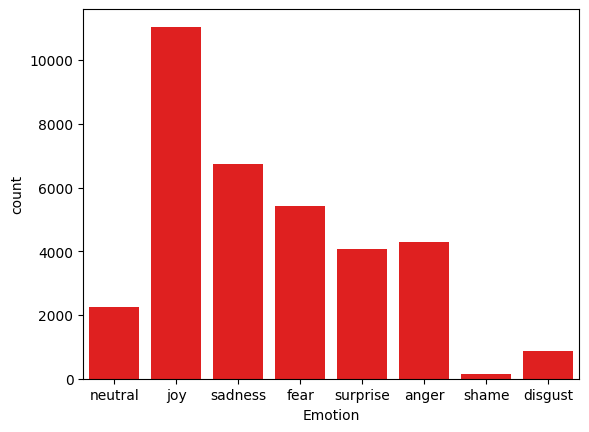

In [18]:
sns.countplot(x='Emotion',data=df,color='r')

In [19]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [20]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
from nltk.tokenize import word_tokenize,sent_tokenize

In [22]:
from nltk.corpus  import stopwords

In [23]:
import nltk
nltk.download('punkt')

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    
    for i in text:

        if i not in stopwords.words('english')and not i.isdigit():

            y.append(i)
    text=y[:]
    y.clear        
    return " ".join(text)




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
# Example usage:
input_text = "Hello! This is an example text with punctuation and numbers, like 123."
transformed_text = transform_text(input_text)
print(transformed_text)

hello ! example text punctuation numbers , like .


In [25]:
import string

In [26]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
df['Clean_text']=df['Text'].apply(transform_text)

In [28]:
df['Clean_text']

0                                                        ?
1                         sage act upgrade list tommorow .
2        way homegirl baby funeral ! ! ! man hate funer...
3        eye ! true hazel eye-and brilliant ! regular f...
4        @ iluvmiasantos ugh babe .. hugggzzz u . ! bab...
                               ...                        
34787    @ michelgw gift ! hope like ! 's hand made wea...
34788    world didnt give .. world definitely cnt take ...
34789                                   man robbed today .
34790               youu call jealousy , call # losing ...
34791                              think baby , dream time
Name: Clean_text, Length: 34792, dtype: object

In [29]:
df

,Emotion,Text,Clean_text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,sage act upgrade list tommorow .
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,way homegirl baby funeral ! ! ! man hate funer...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,@ iluvmiasantos ugh babe .. hugggzzz u . ! bab...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,@ michelgw gift ! hope like ! 's hand made wea...
34788,joy,The world didnt give it to me..so the world MO...,world didnt give .. world definitely cnt take ...
34789,anger,A man robbed me today .,man robbed today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","youu call jealousy , call # losing ..."


In [28]:
!pip install neattext

In [59]:
# import neattext.functions as nfx

# # Remove the user handles
# df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [60]:
# dir(nfx)

In [61]:
# # Remove the stopwords
# df['Clean_Text1'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [30]:
X=df['Clean_text']
y=df['Emotion']

In [31]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [95]:
cv=CountVectorizer(ngram_range=(1, 2))
X=cv.fit_transform(df['Clean_text'])
# tfidf=TfidfVectorizer()
# X=tfidf.fit_transform(df['Clean_text'])


In [96]:
X.shape

(34792, 224626)

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=42)

In [98]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [84]:
svc=SVC()
svc.fit(X_train,y_train)


SVC()

In [85]:
y_pred=svc.predict(X_test)

In [86]:
print(accuracy_score(y_test,y_pred))

0.6261735964744204


In [43]:
from sklearn.metrics import accuracy_score

In [71]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.6116114198122246


In [72]:
rc=RandomForestClassifier()
rc.fit(X_train,y_train)

RandomForestClassifier()

In [73]:
y_pred=rc.predict(X_test)

In [71]:
print(accuracy_score(y_test,y_pred))

0.6008813949032382


In [99]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

d:\desktop\sms_spam\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [103]:
y_pred=lr.predict(X_test)

In [104]:
y_pred

array(['fear', 'anger', 'sadness', ..., 'sadness', 'anger', 'sadness'],
      dtype=object)

In [105]:
print(accuracy_score(y_test,y_pred))

0.6389155010538418


In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test,ypred))

0.11122820463690362


In [44]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [71]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [77]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [78]:
y_pred=gbc.predict(X_test)

In [79]:
print(accuracy_score(y_test,ypred))

0.18020693619467332


In [94]:
import pickle
pickle.dump(cv,open('vector.pkl','wb'))
pickle.dump(lr,open('lr_model.pkl','wb'))